Python for Data & Analytics<br>
Chapter 17, section 8

*** requires datafile: sales.txt

In [1]:
import pandas as pd
sales = pd.read_csv('sales.txt', index_col='quarter')
sales

,t,sales,holiday
quarter,,,
2020Q1,1,4.2,0
2020Q2,2,4.8,0
2020Q3,3,6.1,0
2020Q4,4,8.9,1
2021Q1,5,8.2,0
2021Q2,6,8.8,0
2021Q3,7,10.1,0
2021Q4,8,13.0,1
2022Q1,9,12.2,0


<AxesSubplot:xlabel='t', ylabel='sales'>

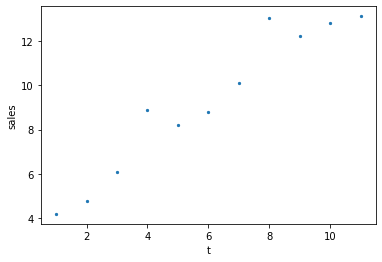

In [2]:
sales.plot('t','sales', kind='scatter', marker='.')

In [3]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(sales[['t']], sales['sales'])

In [4]:
model1.intercept_.round(3) # what is the intercept of the line

3.569

In [5]:
model1.coef_.round(3)[0] # what is the slope of the line

0.954

Text(0, 0.5, 'Sales')

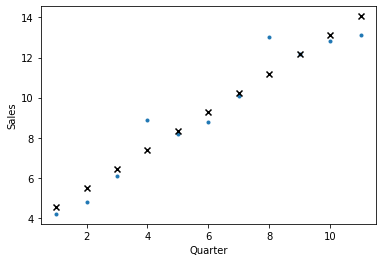

In [6]:
import matplotlib.pyplot as plt
plt.scatter(sales.t, sales.sales, marker='.')
plt.scatter(sales.t, model1.intercept_ + model1.coef_*sales.t, marker='x',
            color='black')
plt.xlabel('Quarter')
plt.ylabel('Sales')

In [7]:
model2 = LinearRegression().fit(sales[['t', 'holiday']], sales['sales'])

In [8]:
model2.intercept_.round(3) # what is the intercept of the model

3.2

In [9]:
model2.coef_.round(3) # what are the values of b1 and b2

array([0.954, 2.028])

Text(0, 0.5, 'Sales')

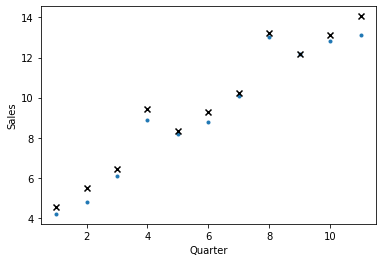

In [10]:
import matplotlib.pyplot as plt
plt.scatter(sales.t, sales.sales, marker='.')
plt.scatter(sales.t,
   model1.intercept_ + model1.coef_*sales.t + model2.coef_[1]*sales.holiday,
   marker='x', color='black')
plt.xlabel('Quarter')
plt.ylabel('Sales')

In [11]:
pointsToPredict = [[12,1],[13,0]]
model2.predict(pointsToPredict).round(1)

array([16.7, 15.6])

In [12]:
model2.score(sales[['t','holiday']], sales['sales']).round(3)*100

99.3

Code from: Python for Data & Analytics, (c) 2023 Rose River Software, LLC